# Simple Linear Regression - Tensorflow 2

## Import libraries

In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 49kB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 3.8MB 30.0MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

%matplotlib inline

random.seed(321)
np.random.seed(321)
tf.random.set_seed(321)

plt.figure(figsize=(14, 11))
plt.rcParams['figure.facecolor'] = 'seashell'
plt.style.use('seaborn')

sns.set(rc={'figure.figsize': (14, 11)})

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<Figure size 1008x792 with 0 Axes>

In [3]:
print(tf.__version__)

2.0.0


## Generate random input data to train on

In [4]:
observations = 10000

# x sample
#xs = np.linspace(0,10,10) + np.random.uniform(low = -10, high = 10, size = (observations, 1))
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

# z sample
#zs = np.linspace(0,10,10) + np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))
print(inputs.shape)

(10000, 2)


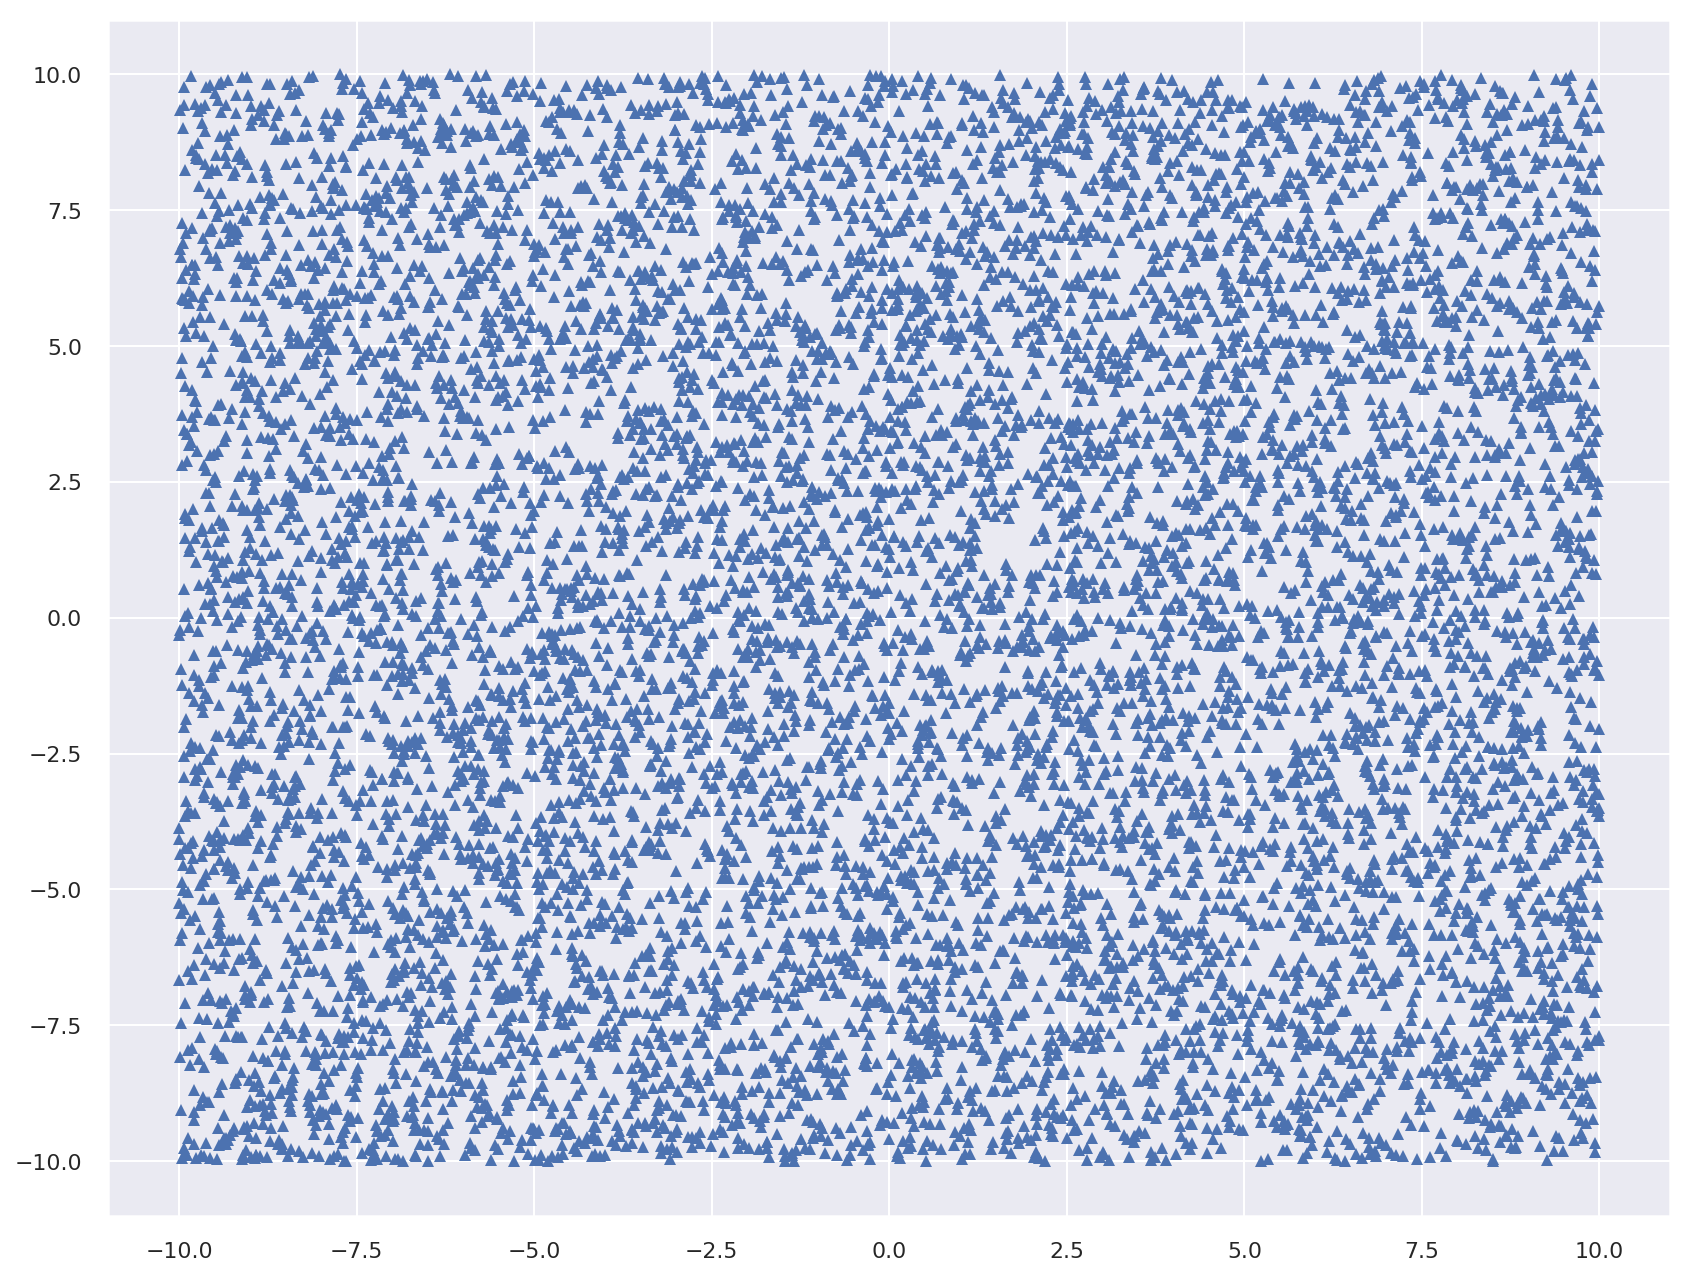

In [5]:
plt.plot(xs, zs, "^")

## Generate target

In [6]:
noise = np.random.uniform(-1, 1, (observations, 1))

# weights are 3, -5 while bias is 8
targets = 3*xs - 5*zs + 8 + noise

print(targets.shape)

(10000, 1)


## Save into npz file

In [0]:
np.savez('SLR_TF_Minimal.npz', inputs=inputs, targets=targets)

Solving with TensorFlow 2

In [0]:
training_data = np.load('SLR_TF_Minimal.npz')

In [9]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer = tf.random_uniform_initializer(-0.1, 0.1),
                                                   bias_initializer = tf.random_uniform_initializer(-0.1, 0.1)
                                                   )
                             ]
                            )

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.02), loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Train on 10000 samples
Epoch 1/100
10000/10000 - 2s - loss: 10.9006
Epoch 2/100
10000/10000 - 1s - loss: 0.3814
Epoch 3/100
10000/10000 - 1s - loss: 0.3667
Epoch 4/100
10000/10000 - 1s - loss: 0.3691
Epoch 5/100
10000/10000 - 1s - loss: 0.3722
Epoch 6/100
10000/10000 - 1s - loss: 0.3772
Epoch 7/100
10000/10000 - 1s - loss: 0.3796
Epoch 8/100
10000/10000 - 1s - loss: 0.3802
Epoch 9/100
10000/10000 - 1s - loss: 0.3762
Epoch 10/100
10000/10000 - 1s - loss: 0.3795
Epoch 11/100
10000/10000 - 1s - loss: 0.3806
Epoch 12/100
10000/10000 - 1s - loss: 0.3707
Epoch 13/100
10000/10000 - 1s - loss: 0.3825
Epoch 14/100
10000/10000 - 1s - loss: 0.3724
Epoch 15/100
10000/10000 - 1s - loss: 0.3749
Epoch 16/100
10000/10000 - 1s - loss: 0.3801
Epoch 17/100
10000/10000 - 1s - loss: 0.3764
Epoch 18/100
10000/10000 - 1s - loss: 0.3746
Epoch 19/100
10000/10000 - 1s - loss: 0.3769
Epoch 20/100
10000/10000 - 1s - loss: 0.3784
Epoch 21/100
10000/10000 - 1s - loss: 0.3786
Epoch 22/100
10000/10000 - 1s - loss: 0.

## Extract the weights and bias

In [10]:
model.layers[0].get_weights()

[array([[ 3.000407],
        [-5.002839]], dtype=float32), array([7.9949217], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 3.000407],
       [-5.002839]], dtype=float32)

In [12]:
bias = model.layers[0].get_weights()[1]
bias

array([7.9949217], dtype=float32)

## Extract the outputs (make predictions)

In [13]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=63028, shape=(10000, 1), dtype=float32, numpy=
array([[ 71.63486  ],
       [-15.346454 ],
       [  3.2594862],
       ...,
       [ 28.546963 ],
       [-36.095787 ],
       [ 45.87952  ]], dtype=float32)>

In [14]:
training_data['targets'].round(1)

array([[ 72. ],
       [-15.4],
       [  3. ],
       ...,
       [ 27.6],
       [-36.9],
       [ 46.4]])

## Plotting the data

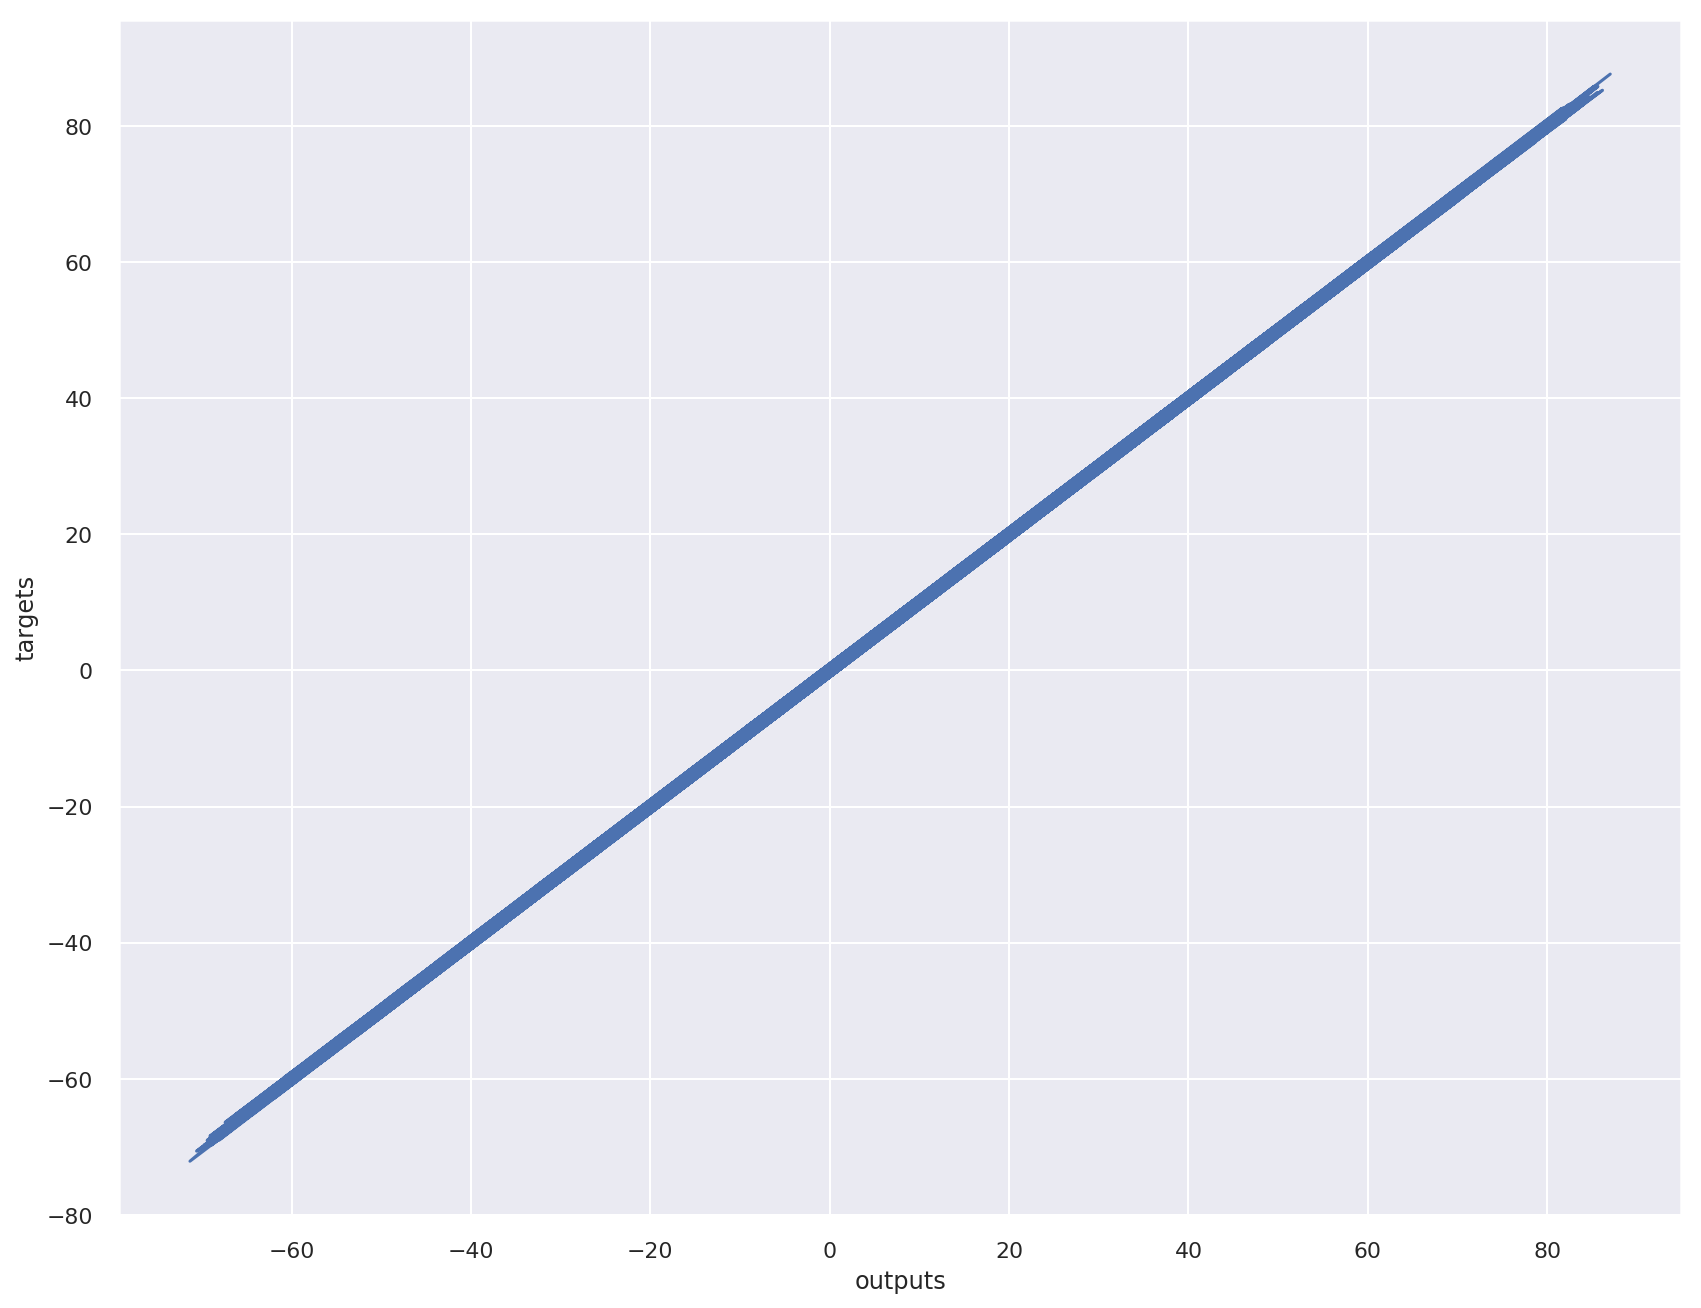

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()